# Full data (16,000 observations) Descriptive Statistics

In [2]:
import os
import json
import pandas as pd

In [6]:
results1 = pd.read_csv('bert_results_frequency_full.csv')
results2 = pd.read_csv('bert_approach_full')

In [7]:
results1

,hdb_string_clusters,Top_SVOs,both,guardian,telegraph
0,-1,"('minister', 'tell', 'mps')\n('secretary', 'te...",0.39,0.40,0.21
1,0,"('you', 'have', 'food')\n('authority', 'provid...",0.53,0.33,0.14
2,1,"('you', 'get', 'flight')\n('aircraft', 'assist...",0.30,0.44,0.26
3,2,"('who', 'visit', 'australia')\n('alex', 'tell'...",0.08,0.88,0.04
4,3,"('government', 'pay', 'million')\n('government...",0.43,0.20,0.37
5,4,"('government', 'spend', 'year')\n('this', 'tak...",0.54,0.27,0.19
6,5,"('president', 'unveil', 'proposal')\n('preside...",0.27,0.65,0.08
7,6,"('police', 'lead', 'investigation')\n('police'...",0.42,0.32,0.26
8,7,"('trump', 'call', 'what')\n('trump', 'face', '...",0.39,0.49,0.12
9,8,"('you', 'compare', 'israel')\n('administration...",0.25,0.68,0.06


In [12]:
df_combined= pd.read_csv('df_combined_coref.csv')
df_combined_svos= pd.read_csv('df_combined_svos.csv')
final_df_coref = pd.read_csv('final_df_coref.csv')
final = pd.read_csv('df_combined_coref_new.csv')

In [13]:
final.shape

(16671, 6)

In [14]:
# Adjusting df_combined to the updated version with 16K rows/news articles
df_combined = final

### Formatting dates

In [5]:
print(df_combined[df_combined['outlet'] == 'telegraph']['date'].head())

8336    2022-12-11
8337    2022-07-26
8338    2020-07-24
8339    2022-03-15
8340    2024-04-22
Name: date, dtype: object


In [6]:
import pandas as pd

def robust_parse_date(date):
    formats = ['%Y-%m-%d %H:%M:%S', '%Y-%m-%d %H:%M:%S%z', '%Y-%m-%d']
    for fmt in formats:
        try:
            return pd.to_datetime(date, format=fmt, errors='raise').date()
        except (ValueError, TypeError):
            continue
    return pd.NaT 

# Converting date column using the robust parser
df_combined['date'] = df_combined['date'].apply(robust_parse_date)

# Checking how many entries were successfully converted and how many were not
print("Converted dates:", df_combined['date'].notna().sum())
print("Unconverted dates (NaT):", df_combined['date'].isna().sum())


Converted dates: 15538
Unconverted dates (NaT): 1134


### Frequency over time

In [7]:
import spacy
import pandas as pd

# Ensure the SpaCy model is downloaded
try:
    nlp = spacy.load('en_core_web_sm')
except OSError:
    print("Downloading the SpaCy model...")
    from spacy.cli import download
    download('en_core_web_sm')
    nlp = spacy.load('en_core_web_sm')

2024-06-04 11:21:37.340050: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 11:21:39.176099: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/data/scro4790/Telegraph/output/perigon_rerun/output/thesis/lib/python3.10/site-packages/spacy/util.py:887: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.5.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/data/scro4790/Telegraph/output/perigon_rerun/output/thesis/lib/python

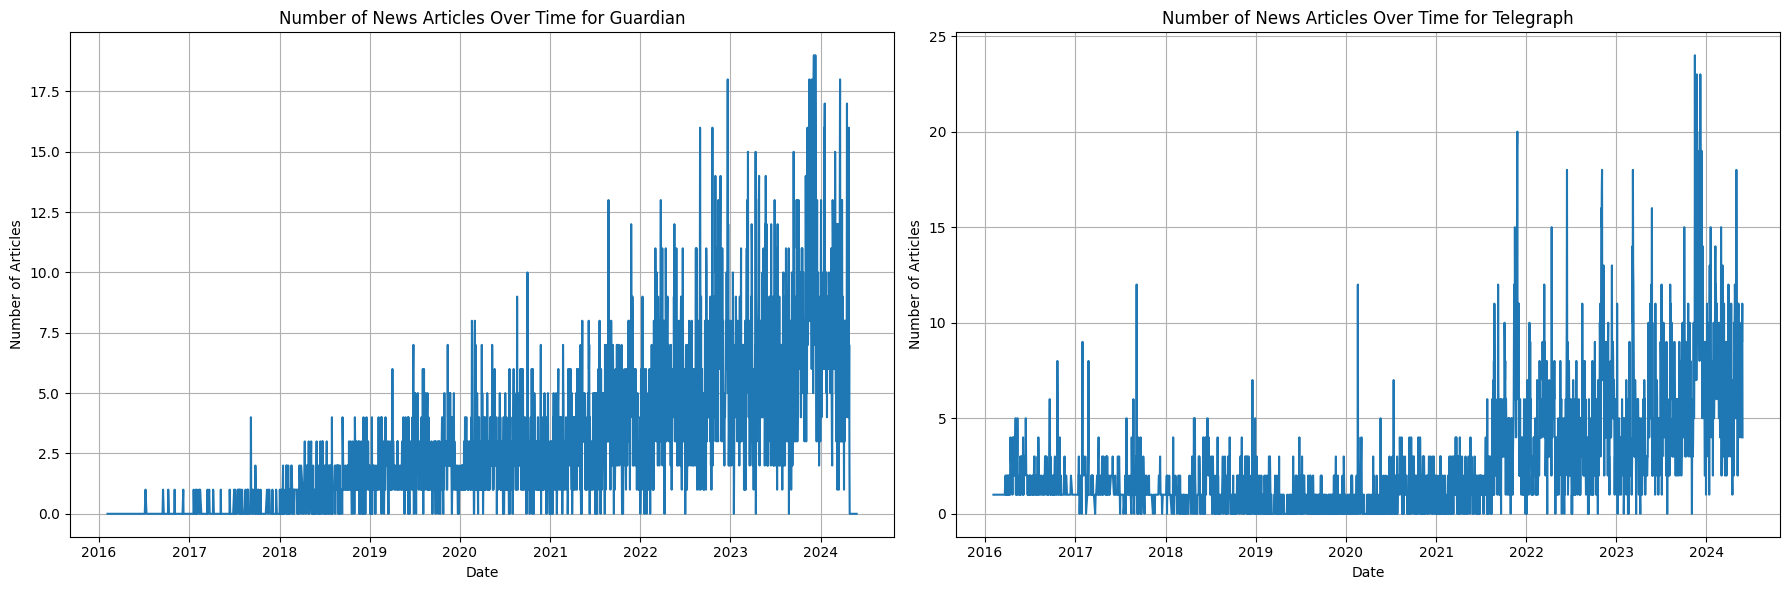

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by date and Outlet, then count entries
article_counts = df_combined.groupby(['date', 'outlet']).size().unstack(fill_value=0)

# Define the figure and the axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))  # 1 row, 2 columns

# Check if 'Guardian' is in the data
if 'guardian' in article_counts.columns:
    article_counts['guardian'].plot(ax=axes[0])  # Plot Guardian on the first subplot
    axes[0].set_title('Number of News Articles Over Time for Guardian')
    axes[0].set_xlabel('Date')
    axes[0].set_ylabel('Number of Articles')
    axes[0].grid(True)

# Check if 'Telegraph' is in the data
if 'telegraph' in article_counts.columns:
    article_counts['telegraph'].plot(ax=axes[1])  # Plot Telegraph on the second subplot
    axes[1].set_title('Number of News Articles Over Time for Telegraph')
    axes[1].set_xlabel('Date')
    axes[1].set_ylabel('Number of Articles')
    axes[1].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


The Pearson correlation coefficient between the article counts of the Guardian and Telegraph for overlapping dates is: 0.59


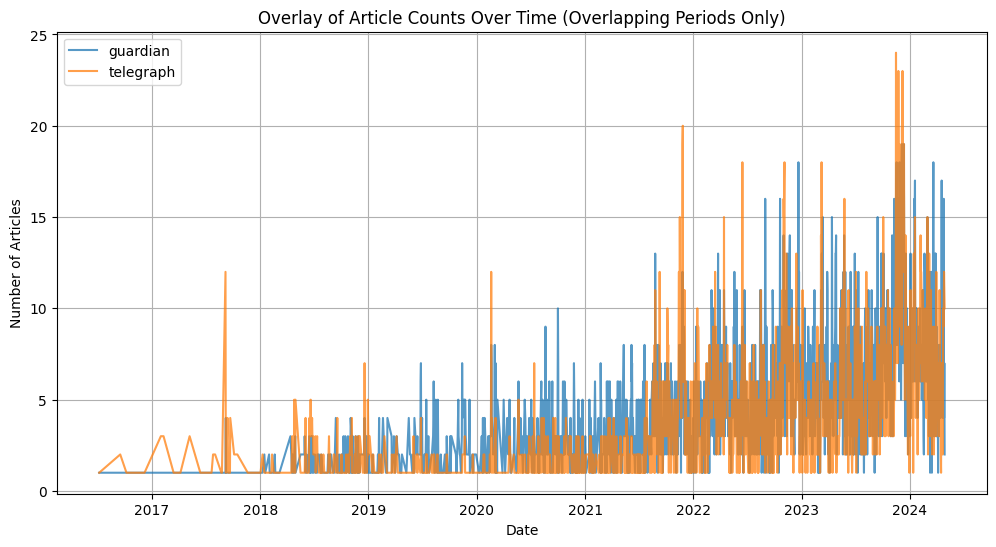

In [9]:
# correlation in spikes
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_combined has a 'date' column in datetime format and 'outlet' as category
df_combined['date'] = pd.to_datetime(df_combined['date'])  # Ensure the date is in datetime format
article_counts = df_combined.groupby(['date', 'outlet']).size().unstack(fill_value=0)
article_counts = article_counts.asfreq('D', fill_value=0)
filtered_article_counts = article_counts[(article_counts['guardian'] > 0) & (article_counts['telegraph'] > 0)]

# Compute Pearson correlation only on filtered data
if 'guardian' in filtered_article_counts.columns and 'telegraph' in filtered_article_counts.columns:
    correlation = filtered_article_counts['guardian'].corr(filtered_article_counts['telegraph'])
    print(f"The Pearson correlation coefficient between the article counts of the Guardian and Telegraph for overlapping dates is: {correlation:.2f}")
else:
    print("Data for one or both outlets is missing or there are no overlapping dates with data.")

# Plot only the overlapping data
plt.figure(figsize=(12, 6))
if 'guardian' in filtered_article_counts.columns and 'telegraph' in filtered_article_counts.columns:
    plt.plot(filtered_article_counts.index, filtered_article_counts['guardian'], label='guardian', alpha=0.75)
    plt.plot(filtered_article_counts.index, filtered_article_counts['telegraph'], label='telegraph', alpha=0.75)
    plt.title('Overlay of Article Counts Over Time (Overlapping Periods Only)')
    plt.xlabel('Date')
    plt.ylabel('Number of Articles')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    plt.text(0.5, 0.5, 'No overlapping data available', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
    plt.show()


In [16]:
import pandas as pd
import swifter  # Efficiently apply any function to a pandas dataframe
import spacy

df_combined = pd.read_csv('df_combined_coref_words')

# nlp = spacy.load("en_core_web_sm")
# df_combined['word_count'] = df_combined['body_resolved'].swifter.apply(
#     lambda x: len(nlp(x).text.split()) if x.strip() else 0
# )
# num_rows_with_zero_words = (df_combined['word_count'] == 0).sum()
# df_combined = df_combined[df_combined['word_count'] > 0]
# print(f"Number of rows with zero words dropped: {num_rows_with_zero_words}")

In [17]:
df_combined

,Unnamed: 0.1,Unnamed: 0,date,title,body,outlet,body_resolved,word_count
0,0,0,2023-04-24,Scandal of Syria’s stolen homes: fraudsters us...,It was through an unexpected phone call from a...,guardian,It was through an unexpected phone call from a...,1198
1,1,1,2024-01-19,Russia-Ukraine war: Kyiv says attack on Russia...,It is now approaching 6pm in Kyiv. Here is a q...,guardian,It is now approaching 6 pm in Kyiv . Here is a...,3864
2,2,2,2019-11-23,Immigration under Labour would be driven by va...,"A Labour government would make values, not num...",guardian,"A Labour government would make values , not nu...",1136
3,3,3,2021-09-17,NHS trusts wrongly billing vulnerable migrants...,NHS trusts are wrongly hounding vulnerable mig...,guardian,NHS trusts are wrongly hounding vulnerable mig...,867
4,4,4,2020-10-08,Australia's English test for partner visas cou...,The federal governments plan to force people s...,guardian,The federal governments plan to force people s...,1030
...,...,...,...,...,...,...,...,...
16665,16666,16667,2022-08-16,Foreign Office officials tried to thwart Rwand...,Foreign Office officials tried to block Priti...,telegraph,Foreign Office officials tried to block Prit...,537
16666,16667,16668,2021-11-11,"Prepare for Russian invasion of Ukraine, US wa...",The United States has warned European allies ...,telegraph,The United States has warned European allies...,932
16667,16668,16669,2023-08-27,Illegal migrants to be electronically tagged i...,Thousands of migrants who enter the UK illega...,telegraph,Thousands of migrants who enter the UK illeg...,847
16668,16669,16670,2024-01-06,Israel-Hamas war: IDF brings enormous blimp ou...,The Israel Defense Forces IDF has brought an ...,telegraph,The Israel Defense Forces IDF has brought an...,3036


In [19]:
# df_combined.to_csv('df_combined_coref.csv')

### Descriptive stats of outlet articles

In [18]:
import pandas as pd
import textstat

df_combined['date'] = pd.to_datetime(df_combined['date'])

# Number of articles per outlet
total_articles = df_combined['outlet'].value_counts()

# Number of articles per year per outlet
df_combined['year'] = df_combined['date'].dt.year
articles_per_year = df_combined.groupby(['outlet', 'year']).size().groupby(level=0).mean()

# Number of articles per month per outlet
df_combined['month'] = df_combined['date'].dt.to_period('M')
articles_per_month = df_combined.groupby(['outlet', 'month']).size().groupby(level=0).mean()

# Average word count of body text per outlet
df_combined['word_count'] = df_combined['body'].apply(lambda x: len(x.split()))
average_word_count = df_combined.groupby('outlet')['word_count'].mean()

# Readability score of title and body
df_combined['title_readability'] = df_combined['title'].apply(textstat.flesch_reading_ease)
df_combined['body_readability'] = df_combined['body'].apply(textstat.flesch_reading_ease)
average_title_readability = df_combined.groupby('outlet')['title_readability'].mean()
average_body_readability = df_combined.groupby('outlet')['body_readability'].mean()

# Descriptive Stats Dataframe 
summary_stats = pd.DataFrame({
    'Total Articles': total_articles,
    'Avg Articles per Year': articles_per_year,
    'Avg Articles per Month': articles_per_month,
    'Avg Word Count': average_word_count,
    'Avg Title Readability Score': average_title_readability,
    'Avg Body Readability Score': average_body_readability
})

In [19]:
summary_stats.to_csv('descriptive_stats')
summary_stats


,Total Articles,Avg Articles per Year,Avg Articles per Month,Avg Word Count,Avg Title Readability Score,Avg Body Readability Score
outlet,,,,,,
guardian,8336,926.222222,89.634409,1329.686420,63.393848,55.756899
telegraph,8334,800.222222,72.020000,950.957403,65.112239,56.407965


In [20]:
df_combined

,Unnamed: 0.1,Unnamed: 0,date,title,body,outlet,body_resolved,word_count,year,month,title_readability,body_readability
0,0,0,2023-04-24,Scandal of Syria’s stolen homes: fraudsters us...,It was through an unexpected phone call from a...,guardian,It was through an unexpected phone call from a...,1078,2023.0,2023-04,75.20,57.61
1,1,1,2024-01-19,Russia-Ukraine war: Kyiv says attack on Russia...,It is now approaching 6pm in Kyiv. Here is a q...,guardian,It is now approaching 6 pm in Kyiv . Here is a...,3522,2024.0,2024-01,40.69,54.76
2,2,2,2019-11-23,Immigration under Labour would be driven by va...,"A Labour government would make values, not num...",guardian,"A Labour government would make values , not nu...",1012,2019.0,2019-11,52.87,56.59
3,3,3,2021-09-17,NHS trusts wrongly billing vulnerable migrants...,NHS trusts are wrongly hounding vulnerable mig...,guardian,NHS trusts are wrongly hounding vulnerable mig...,795,2021.0,2021-09,34.93,55.47
4,4,4,2020-10-08,Australia's English test for partner visas cou...,The federal governments plan to force people s...,guardian,The federal governments plan to force people s...,934,2020.0,2020-10,73.17,54.36
...,...,...,...,...,...,...,...,...,...,...,...,...
16665,16666,16667,2022-08-16,Foreign Office officials tried to thwart Rwand...,Foreign Office officials tried to block Priti...,telegraph,Foreign Office officials tried to block Prit...,481,2022.0,2022-08,65.73,47.01
16666,16667,16668,2021-11-11,"Prepare for Russian invasion of Ukraine, US wa...",The United States has warned European allies ...,telegraph,The United States has warned European allies...,830,2021.0,2021-11,52.87,58.32
16667,16668,16669,2023-08-27,Illegal migrants to be electronically tagged i...,Thousands of migrants who enter the UK illega...,telegraph,Thousands of migrants who enter the UK illeg...,782,2023.0,2023-08,59.30,52.53
16668,16669,16670,2024-01-06,Israel-Hamas war: IDF brings enormous blimp ou...,The Israel Defense Forces IDF has brought an ...,telegraph,The Israel Defense Forces IDF has brought an...,2722,2024.0,2024-01,59.30,58.32


### Checking for presence of country mentions

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry
import re

countries = [country.name for country in pycountry.countries]

# Define a function to count countries mentioned in a text
def count_countries(text):
    country_mentions = {country: 0 for country in countries}
    if pd.notna(text):
        for country in countries:
            if re.search(r'\b' + re.escape(country) + r'\b', text, flags=re.IGNORECASE):
                country_mentions[country] += 1
    return country_mentions

# Apply the function to each row in the DataFrame
df_combined['country_mentions'] = df_combined['body_resolved'].apply(count_countries)

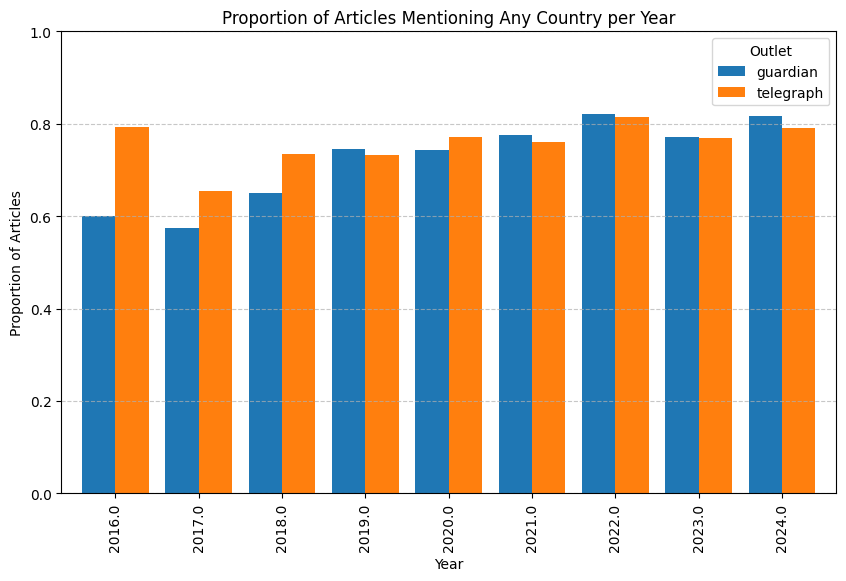

In [22]:
# Extract year from date if it's not already a column
import pandas as pd
import matplotlib.pyplot as plt

df_combined['date'] = pd.to_datetime(df_combined['date'])
df_combined['year'] = df_combined['date'].dt.year
def detect_country_mentions(country_counts):
    return any(count > 0 for count in country_counts.values())
df_combined['mentions_any_country'] = df_combined['country_mentions'].apply(detect_country_mentions)
proportion_by_outlet_year = df_combined.groupby(['outlet', 'year'])['mentions_any_country'].mean().unstack(0)

# Plotting the data
ax = proportion_by_outlet_year.plot(kind='bar', figsize=(10, 6), width=0.8)
ax.set_title('Proportion of Articles Mentioning Any Country per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Proportion of Articles')
ax.set_ylim(0, 1)
ax.grid(True, linestyle='--', which='both', axis='y', alpha=0.7)
plt.legend(title='Outlet')
plt.show()

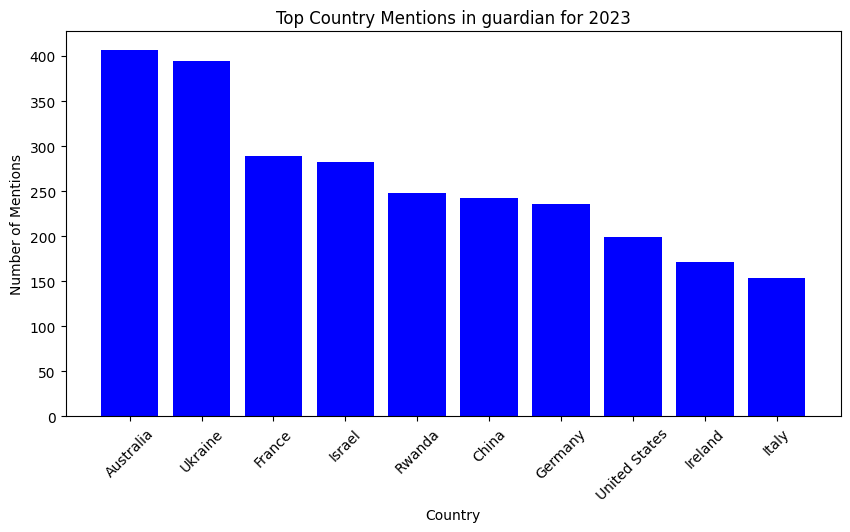

In [23]:
def plot_top_countries(df, outlet, year):
    data = df[(df['outlet'] == outlet) & (df['year'] == year)]
    all_mentions = {}
    for mentions in data['country_mentions']:
        for country, count in mentions.items():
            if count > 0:
                all_mentions[country] = all_mentions.get(country, 0) + count

    # Sort countries by mentions and get top 10
    top_countries = sorted(all_mentions.items(), key=lambda item: item[1], reverse=True)[:10]
    countries, counts = zip(*top_countries)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(countries, counts, color='blue')
    plt.xlabel('Country')
    plt.ylabel('Number of Mentions')
    plt.title(f'Top Country Mentions in {outlet} for {year}')
    plt.xticks(rotation=45)
    plt.show()

plot_top_countries(df_combined, 'guardian', 2023)  # Adjust as necessary for other outlets and years


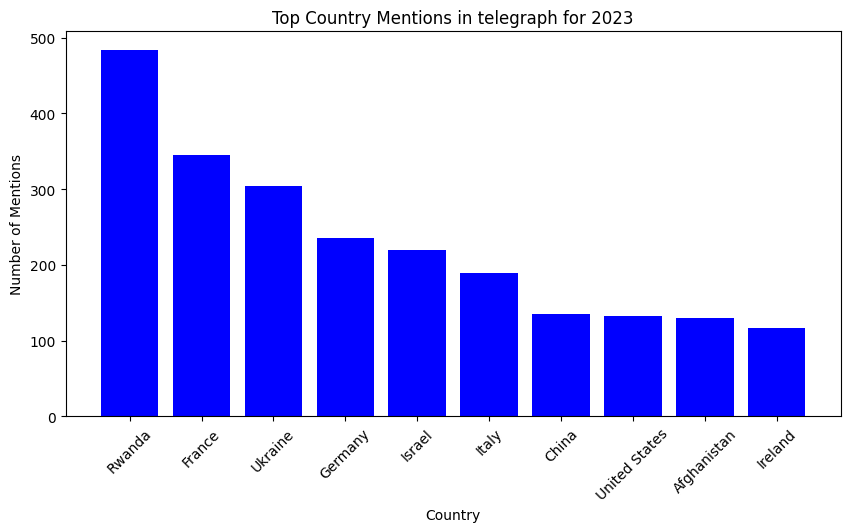

In [24]:
plot_top_countries(df_combined, 'telegraph', 2023)  # Adjust as necessary for other outlets and years

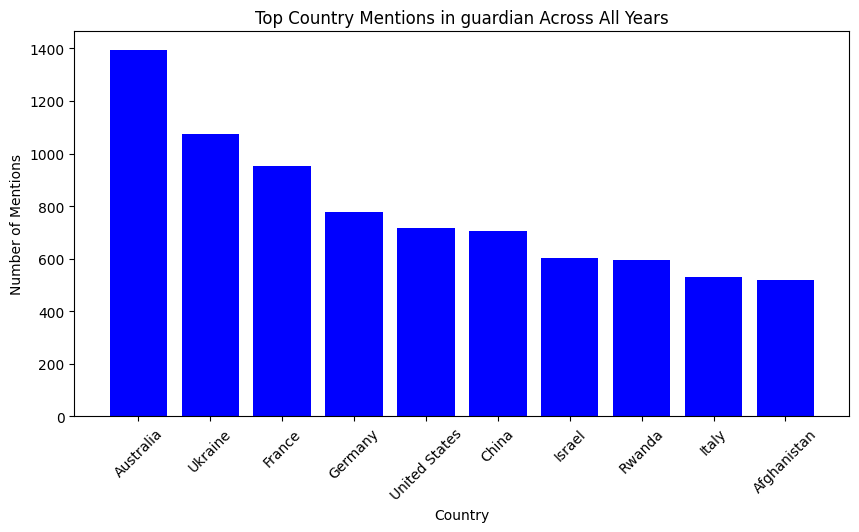

In [25]:
import matplotlib.pyplot as plt

def plot_top_countries_by_outlet(df, outlet):
    # Filter the DataFrame by outlet
    data = df[df['outlet'] == outlet]

    # Aggregate mentions across all years for the specified outlet
    all_mentions = {}
    for mentions in data['country_mentions']:
        for country, count in mentions.items():
            if count > 0:
                all_mentions[country] = all_mentions.get(country, 0) + count

    # Sort countries by mentions and get top 10
    top_countries = sorted(all_mentions.items(), key=lambda item: item[1], reverse=True)[:10]
    countries, counts = zip(*top_countries)  # Unzip the list of tuples

    # Plot
    plt.figure(figsize=(10, 5))
    plt.bar(countries, counts, color='blue')
    plt.xlabel('Country')
    plt.ylabel('Number of Mentions')
    plt.title(f'Top Country Mentions in {outlet} Across All Years')
    plt.xticks(rotation=45)
    plt.show()

plot_top_countries_by_outlet(df_combined, 'guardian')  # Specify 'Telegraph' or other outlets as needed


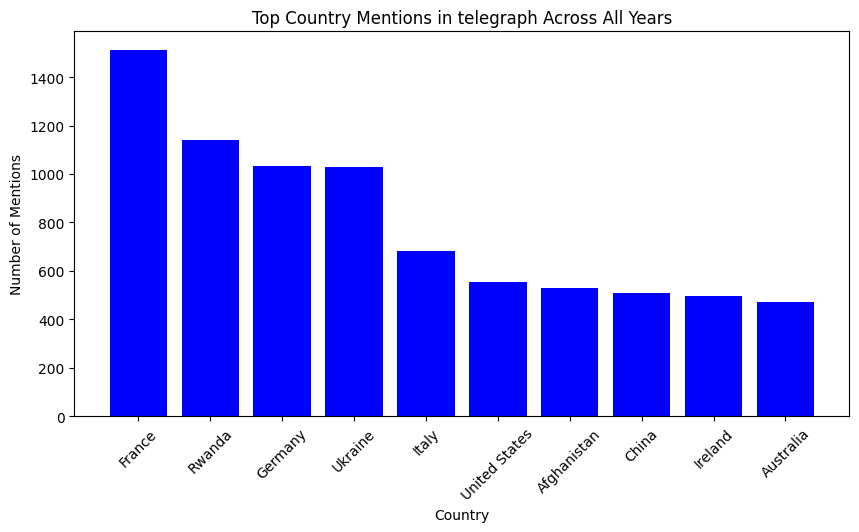

In [26]:
plot_top_countries_by_outlet(df_combined, 'telegraph')

In [27]:
# EU versus non-EU mentions

import matplotlib.pyplot as plt

def plot_eu_vs_non_eu_mentions(df, outlet):
    # List of EU countries (as of 2021)
    eu_countries = {
        "Austria", "Italy", "Belgium", "Latvia", "Bulgaria", "Lithuania", "Croatia", "Luxembourg",
        "Cyprus", "Malta", "Czech Republic", "Netherlands", "Denmark", "Poland", "Estonia",
        "Portugal", "Finland", "Romania", "France", "Slovakia", "Germany", "Slovenia", "Greece",
        "Spain", "Hungary", "Sweden", "Ireland"
    }

    # Filter the DataFrame by outlet
    data = df[df['outlet'] == outlet]

    # Initialize counters for EU and non-EU mentions
    eu_mentions = 0
    non_eu_mentions = 0

    # Aggregate mentions across all years for the specified outlet
    for mentions in data['country_mentions']:
        for country, count in mentions.items():
            if count > 0:
                if country in eu_countries:
                    eu_mentions += count
                else:
                    non_eu_mentions += count

    # Data to plot
    labels = ['EU', 'Non-EU']
    sizes = [eu_mentions, non_eu_mentions]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(labels, sizes, color=['blue', 'red'])
    plt.xlabel('Region')
    plt.ylabel('Number of Mentions')
    plt.title(f'EU vs Non-EU Country Mentions in {outlet}')
    plt.show()



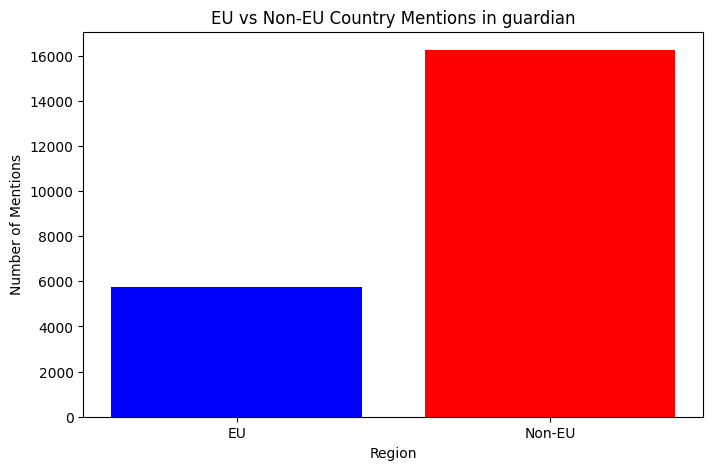

In [28]:
plot_eu_vs_non_eu_mentions(df_combined, 'guardian') 

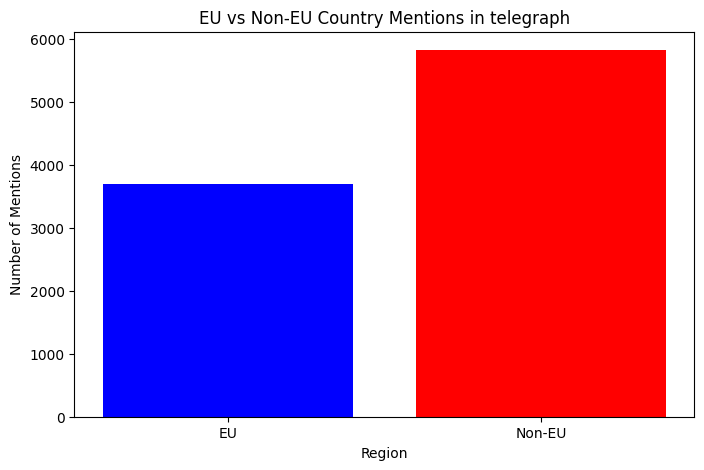

In [52]:
plot_eu_vs_non_eu_mentions(df_combined, 'telegraph') 

In [29]:
import matplotlib.pyplot as plt

def plot_global_north_vs_south_mentions(df, outlet):
    # Lists of countries in the Global North and Global South (broad categorization)
    global_north_countries = {
    "United States", "Canada", "Australia", "New Zealand", "Japan", "South Korea",
    "Singapore", "Israel", "Norway", "Switzerland", "Iceland", "Liechtenstein",
    "United Kingdom", "Germany", "France", "Italy", "Spain", "Portugal", "Sweden", 
    "Denmark", "Finland", "Austria", "Belgium", "Luxembourg", "Netherlands", 
    "Ireland", "Greece", "Cyprus", "Malta", "Czech Republic", "Slovakia",
    "Slovenia", "Estonia", "Latvia", "Lithuania", "Poland", "Hungary", "Croatia",
    "Romania", "Bulgaria"}

    global_south_countries = {
    "Mexico", "Guatemala", "Belize", "El Salvador", "Honduras", "Nicaragua", "Costa Rica", "Panama",
    "Colombia", "Venezuela", "Guyana", "Suriname", "Ecuador", "Peru", "Bolivia", "Brazil", "Paraguay", 
    "Chile", "Argentina", "Uruguay",
    "Morocco", "Algeria", "Tunisia", "Libya", "Egypt", "Sudan", "South Sudan", "Western Sahara", 
    "Mauritania", "Mali", "Niger", "Chad", "Senegal", "Gambia", "Guinea-Bissau", "Guinea", "Sierra Leone",
    "Liberia", "Côte d'Ivoire", "Burkina Faso", "Ghana", "Togo", "Benin", "Nigeria", "Cameroon", "Cape Verde",
    "Sao Tome and Principe", "Equatorial Guinea", "Gabon", "Central African Republic", "Congo", "DR Congo",
    "Uganda", "Kenya", "Tanzania", "Burundi", "Rwanda", "Somalia", "Djibouti", "Ethiopia", "Eritrea", 
    "Angola", "Mozambique", "Zambia", "Zimbabwe", "Malawi", "Namibia", "Botswana", "South Africa", "Lesotho", "Eswatini",
    "India", "Pakistan", "Bangladesh", "Philippines", "Vietnam", "Indonesia", "Turkey", 
    "Iran", "Iraq", "Afghanistan", "Syria", "Lebanon", "Jordan", "Saudi Arabia", "Yemen", 
    "Oman", "United Arab Emirates", "Qatar", "Bahrain", "Kuwait", 
    "Thailand", "Myanmar", "Cambodia", "Laos", "Malaysia", "Brunei"}

    # Filter the DataFrame by outlet
    data = df[df['outlet'] == outlet]

    # Initialize counters for Global North and Global South mentions
    north_mentions = 0
    south_mentions = 0

    # Aggregate mentions across all years for the specified outlet
    for mentions in data['country_mentions']:
        for country, count in mentions.items():
            if count > 0:
                if country in global_north_countries:
                    north_mentions += count
                elif country in global_south_countries:
                    south_mentions += count

    # Data to plot
    labels = ['Global North', 'Global South']
    sizes = [north_mentions, south_mentions]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.bar(labels, sizes, color=['green', 'yellow'])
    plt.xlabel('Region')
    plt.ylabel('Number of Mentions')
    plt.title(f'Global North vs Global South Country Mentions in {outlet}')
    plt.show()



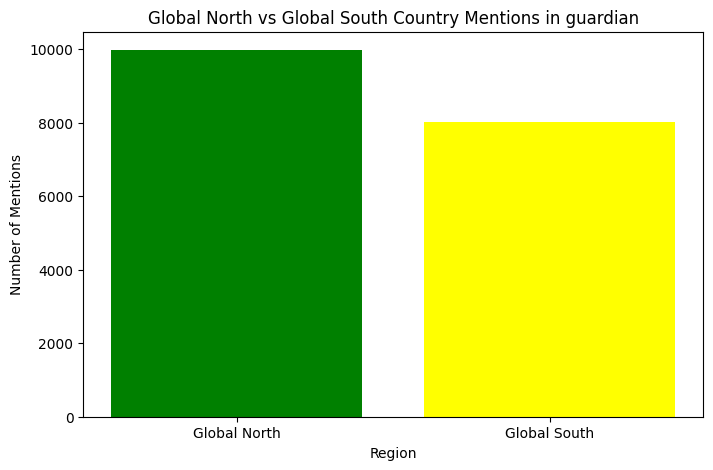

In [30]:
plot_global_north_vs_south_mentions(df_combined, 'guardian') 

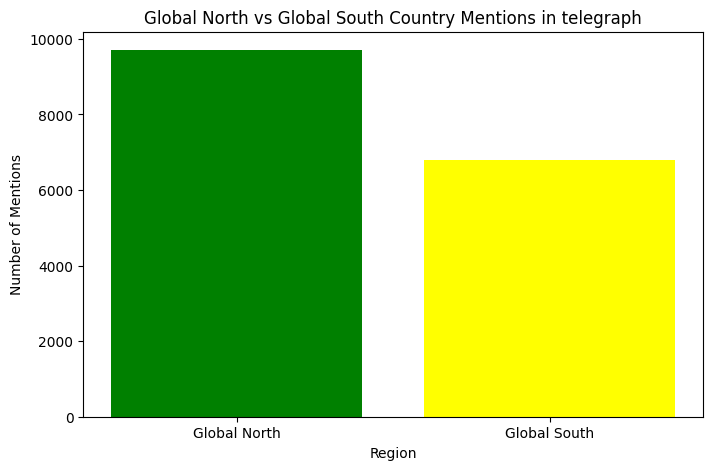

In [31]:
plot_global_north_vs_south_mentions(df_combined, 'telegraph') 